### 의사결정 나무 알고리즘

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
# iris 데이터를 x와 y로 , 트레이닝과 테스트 셋으로 나눈다.
iris_dt = load_iris()
x, y = iris_dt['data'], iris_dt['target']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [4]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(train_x, train_y)
tree_clf.score(test_x, test_y)

1.0

In [5]:
pd.DataFrame([tree_clf.predict(test_x), test_y], index=['pred_y', 'y'])

0   1   2   3   4   5   6   7   8   9   ...  20  21  22  23  24  25  \
pred_y   2   1   0   2   0   2   0   1   1   1  ...   2   1   0   0   2   0   
y        2   1   0   2   0   2   0   1   1   1  ...   2   1   0   0   2   0   

        26  27  28  29  
pred_y   0   1   1   0  
y        0   1   1   0  

[2 rows x 30 columns]

### 의사결정 나무 알고리즘 그래프 그리기

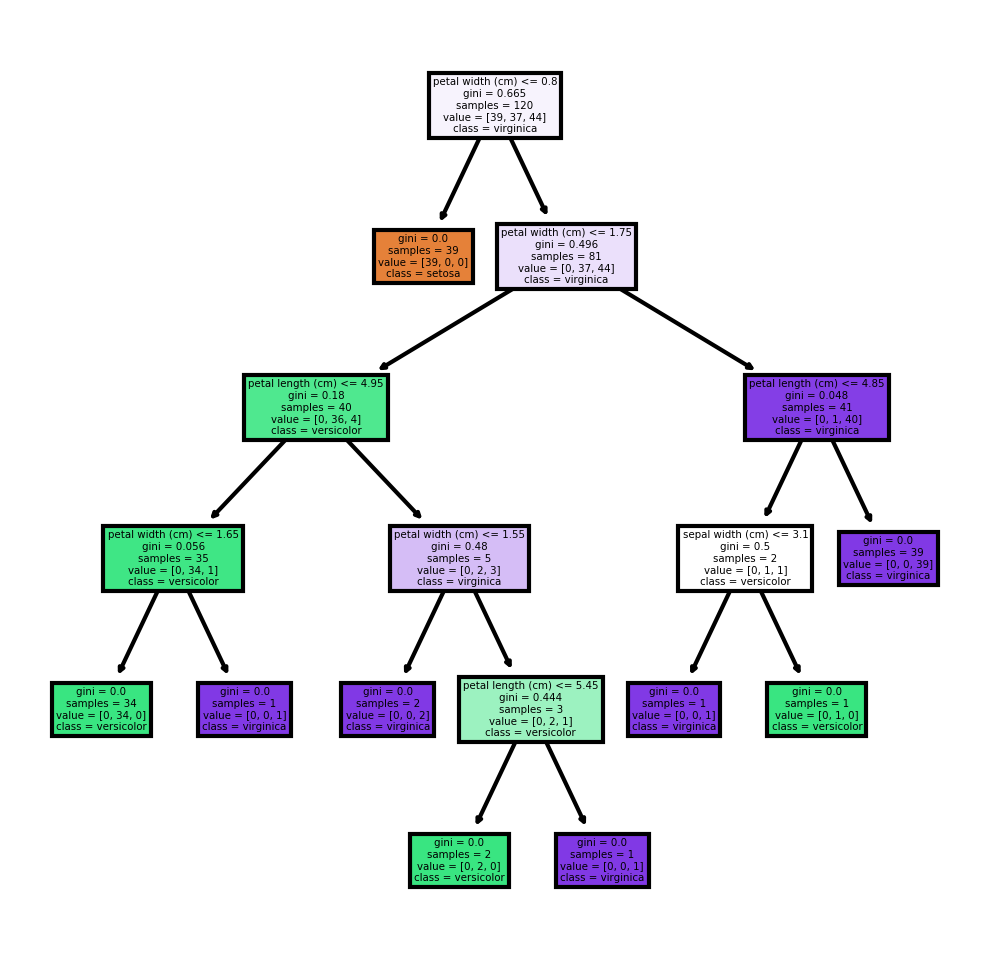

In [7]:
fn = iris_dt.feature_names
cn = list(iris_dt.target_names)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(tree_clf, feature_names=fn, class_names=cn, filled = True)
fig.savefig('tree_clf.png')

In [8]:
tree_importance_se = pd.Series(tree_clf.feature_importances_, index=iris_dt.feature_names)
tree_importance_se

sepal length (cm)    0.000000
sepal width (cm)     0.012534
petal length (cm)    0.064446
petal width (cm)     0.923020
dtype: float64

<AxesSubplot:>

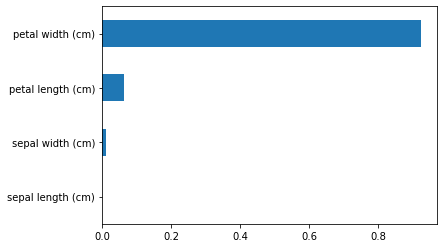

In [10]:
tree_importance_se.plot(kind='barh')